In [53]:
import numpy as np
import pandas as pd
data = pd.read_csv('Q1_data.txt',header=None, usecols=[0,1,2,3,4])

x = data.as_matrix()[:,:4]
y = data.as_matrix()[:,-1]
mask_setosa = np.where(y == "Iris-setosa")[0]
mask_vc = np.where(y == "Iris-versicolor")[0]
y[mask_setosa] = 1
y[mask_vc] = -1

print mask_setosa
print mask_vc

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


In [7]:
training_mask = np.append(mask_setosa[0:35], mask_vc[0:35])
testing_mask = np.append(mask_setosa[35::], mask_vc[35::])

In [9]:
x_train = x[training_mask]
x_test = x[testing_mask]
y_train = y[training_mask]
y_test = y[testing_mask]


37
done
0
37


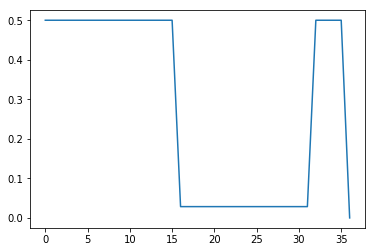

In [54]:
import random
import matplotlib.pyplot as plt
%matplotlib inline 

def predict(X,w,b):
    values = np.dot(X,w) + b
    mapper = lambda x: [-1,1][x >= 0]
    predictions = [mapper(x) for x in values]
    return predictions

def error(X,Y,w,b):
    predictions = predict(X,w,b)
    correctness = predictions == Y
    error = 1 - sum(correctness) / float(len(X))
    return error
    
    

def f(x,w, b):
    v = np.dot(w.T, x) + b
    if v >= 0:
        return 1
    return -1

def perceptron_learn(X,Y, max_iterations):
    w = np.array([random.random() for i in range(len(X[0]))])
    b = random.random()
    lam = 0.1
    error_rate = 1
    it = 0
    errors = []
    while error_rate != 0 and it < max_iterations:
        error_rate = error(X,Y,w,b)
        errors.append(error_rate)
        i = random.randrange(0, len(X))
        prediction = f(X[i], w, b)
        it = it + 1
        if prediction == Y[i]:
            continue
        else:
            w = w + lam*(Y[i] - prediction)*X[i]
            b = b + lam*(Y[i] - prediction)

    print it
    return w,b,errors

w,b,e = perceptron_learn(x_train,y_train,1000)
print "done"

print sum(predict(x, w, b))

plt.plot([x for x in range(0,len(e))], e)
print len(e)

In [10]:
data[0]

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
     ... 
70    5.9
71    6.1
72    6.3
73    6.1
74    6.4
75    6.6
76    6.8
77    6.7
78    6.0
79    5.7
80    5.5
81    5.5
82    5.8
83    6.0
84    5.4
85    6.0
86    6.7
87    6.3
88    5.6
89    5.5
90    5.5
91    6.1
92    5.8
93    5.0
94    5.6
95    5.7
96    5.7
97    6.2
98    5.1
99    5.7
Name: 0, Length: 100, dtype: float64